In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Lineare Regression

mse: 676.3154563392399
R²: 0.9563452164646404


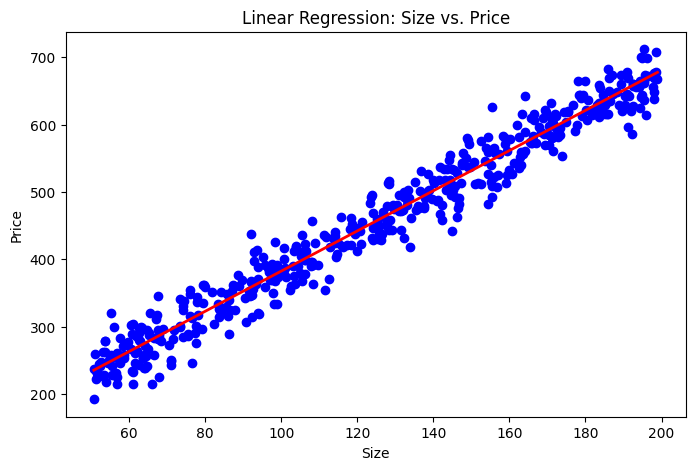

In [17]:
house_data_df = pd.read_csv("house_data.csv")

#print(house_data_df.head(5))

X = house_data_df[["Size"]]
Y = house_data_df["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)

y_pred = model_lr.predict(X_test)

mse = mean_squared_error(Y_test,y_pred)
r_squared = r2_score(Y_test,y_pred)
print(f"mse: {mse}")
print(f"R²: {r_squared}")


plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', label='Data')

size_range = pd.DataFrame({'Size': [X['Size'].min(), X['Size'].max()]})
price_pred_line = model_lr.predict(size_range)

plt.plot(size_range, price_pred_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Linear Regression: Size vs. Price')
plt.show()


## Kmeans

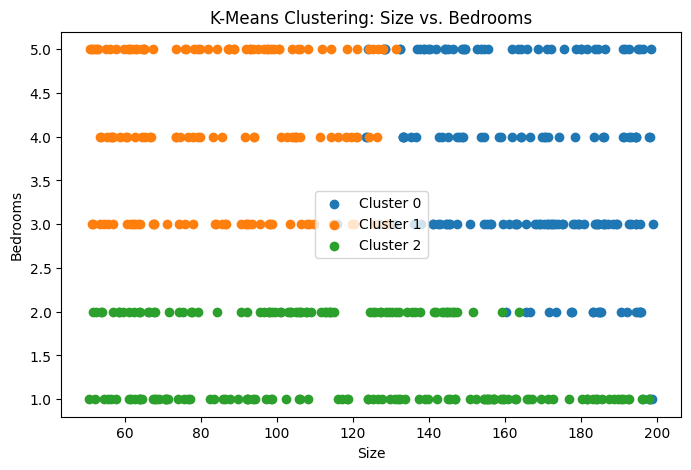

Koordinaten von Clusterzentrum 0:  Size = 590.40, Bedrooms = 3.62
Koordinaten von Clusterzentrum 1:  Size = 346.65, Bedrooms = 4.10
Koordinaten von Clusterzentrum 2:  Size = 412.99, Bedrooms = 1.42
Silhouette Score: 0.3995900705825038


In [ ]:
features = house_data_df[['Price','Bedrooms']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_features)

house_data_df["cluster"]= clusters

plt.figure(figsize=(8,5))
for cluster in sorted(house_data_df['cluster'].unique()):
    cluster_data = house_data_df[house_data_df['cluster'] == cluster]
    plt.scatter(
        cluster_data['Size'],
        cluster_data['Bedrooms'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Size')
plt.ylabel('Bedrooms')
plt.legend()
plt.title('K-Means Clustering: Size vs. Bedrooms')
plt.show()

centers = scaler.inverse_transform(kmeans.cluster_centers_)

for i,center in enumerate(centers):
    size, bedrooms = center
    print(f"Koordinaten von Clusterzentrum {i}:  Size = {size:.2f}, Bedrooms = {bedrooms:.2f}")

labels = kmeans.labels_
score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {score}")
# mäßig bis mittel mäßig gut -> getrennte aber nicht vollständig getrennte Cluster